In [1]:
# imports 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
cf.go_offline()

In [2]:
# importing the data set
df = pd.read_csv('../data/diamonds_train.csv')

# Exploring the Data Set

In [3]:
# examination the data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


# Information about the columns

- carat: Carat weight of the diamond (Peso en quilates del diamante)
- cut: Describe cut quality of the diamond. Quality in increasing order (Ideal, Premium, Very good, Good, Fair).
- color: D being the best and J the wors
- clarity: How obvious inclusions are within the diamond (IF, VVS2, VS1, VS2, Sl1, Sl2, I1)
- depth % : The height of a diamond, measured from the culet to the table, divided by its average girdle (faja) diameter
- table%: The width of the diamond's table expressed as a percentage of its average diameter
- price: price of each diamond.
- x: lengh mm
- y: width mm (ancho)
- z: depth in mm

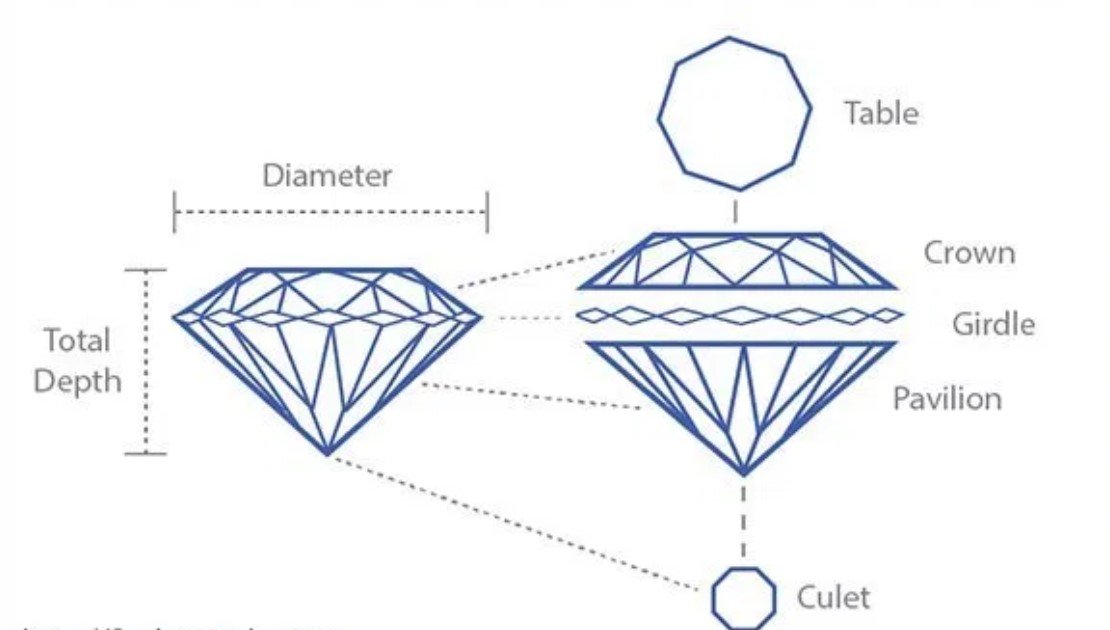

# Challenge 1: Exploratory Data Visualization Charts and Summary Statistics

The goal of this analysis is to understand the relationship between diamonds attributes (features) or group of attributes, and its price.

## Summary Statistics

In [5]:
# summary statistics data frame
df.describe().round(2)

,carat,depth,table,price,x,y,z
count,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00
mean,0.80,61.75,57.45,3928.44,5.73,5.73,3.54
std,0.48,1.43,2.23,3992.42,1.12,1.15,0.70
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,945.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2397.00,5.69,5.71,3.52
75%,1.04,62.50,59.00,5331.00,6.54,6.54,4.04
max,4.50,79.00,95.00,18823.00,10.23,58.90,8.06


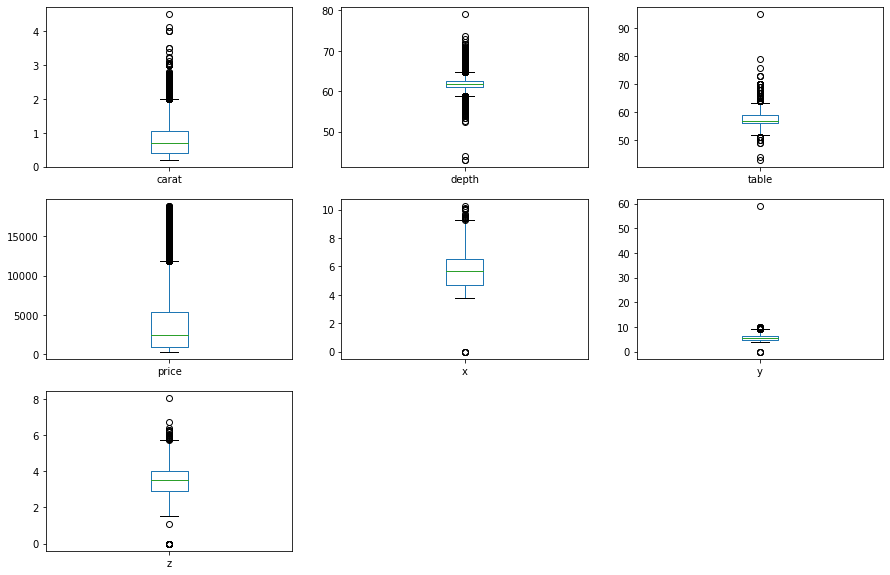

In [6]:
# box plot for all numeric columns
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [7]:
# conclusion: the most of the carat diamonds are between 0.4 and 1.04. There are some outliers up to 2.
# conclusion: there are outliers in both ways, and the mayority of the data are between 61 and 62.5

In [8]:
# correlations
df.corr().round(2)

,carat,depth,table,price,x,y,z
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.97
depth,0.03,1.00,-0.29,-0.01,-0.03,-0.03,0.09
table,0.18,-0.29,1.00,0.13,0.20,0.18,0.16
price,0.92,-0.01,0.13,1.00,0.89,0.87,0.87
x,0.98,-0.03,0.20,0.89,1.00,0.97,0.98
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.96
z,0.97,0.09,0.16,0.87,0.98,0.96,1.00


In [9]:
# first impressions:
# price is very correlated with carat and size, but not much with table.
# ¿table is not related with any column?

## Data Visualization

In [10]:
# first of all, we add a column to know the size of the diamond.

df['size'] = (df['x']*df['y']*df['z']).round(2)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.10
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.40
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.44
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.27
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.43
...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43,221.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73,324.28
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01,163.99
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76,54.90


### Question 1: How much correlated are the different columns?

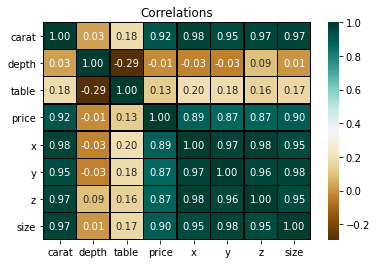

In [11]:
# correlation map
f,ax = plt.subplots(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True,annot_kws = {"size": 10},linecolor = "black", linewidths=0.5, fmt = '.2f', ax=ax,cmap = "BrBG")
plt.title("Correlations")
plt.show()

In [12]:
# CONCLUSION: Price is correlated with z,y,x and carat. But table and dept not much.

### Question 2: How are related size and price?

In [13]:
price_by_size = df.groupby(['size'], as_index=False).agg({'price': 'mean'}).sort_values(by='price', ascending=False)

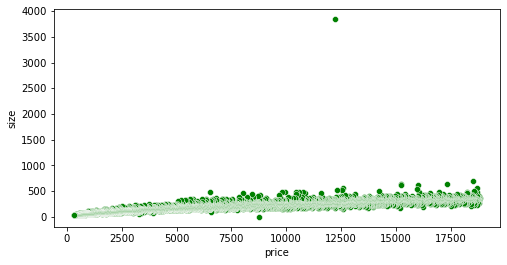

In [14]:
fig = plt.subplots(figsize=(8,4))
ax = sns.scatterplot(data=price_by_size, x='price', y='size', color='green')

In [15]:
# let's check the outlier
price_by_size.max()

size      3840.6
price    18823.0
dtype: float64

In [16]:
# examine and drop because it's not make sense.
df[df['size'] == 3840.6]
df.drop(axis=0, index=14708, inplace=True)

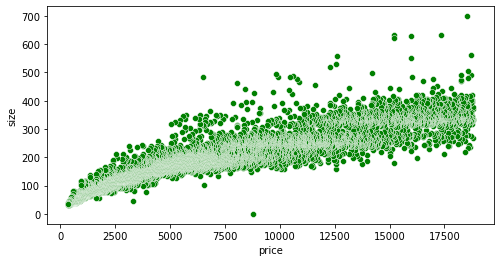

In [17]:
# we make again the scatter plot
price_by_size = df.groupby(['size'], as_index=False).agg({'price': 'mean'}).sort_values(by='price', ascending=False)
fig = plt.subplots(figsize=(8,4))
ax = sns.scatterplot(data=price_by_size, x='price', y='size', color='green')

In [18]:
# CONCLUSION: How much bigger is the diamond, more expensive is it.

### Question 3: How affect the carat to the price? (quilates)

In [19]:
# let's study just carat and price column
carat_by_price = df.groupby('carat', as_index=False).agg({'price': 'mean'}).sort_values(by='price', ascending=False)

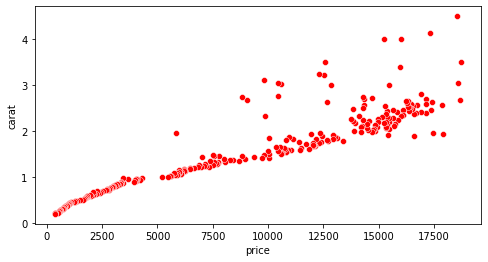

In [20]:
fig = plt.subplots(figsize=(8,4))
ax = sns.scatterplot(data=carat_by_price, x='price', y='carat', color='red')

In [21]:
# CONCLUSION: The graph shows the positive correlation between carat and price of diamonds.
# But, in some cases, this is not true probably due tu the size of the diamon.

### Question 3: Which is the most expensive color?

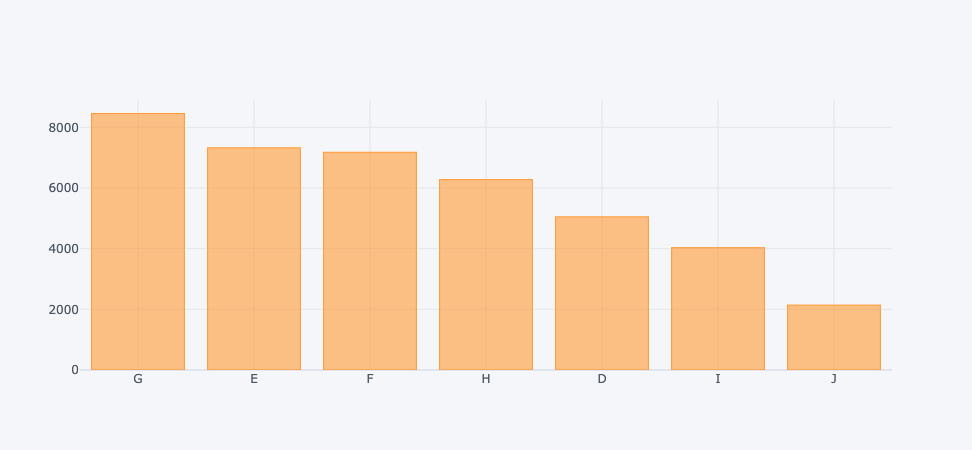

In [22]:
# total diamonds for each color
count_by_color = df['color'].value_counts()
count_by_color.iplot(kind='bar')

In [23]:
# grouping by color and mean price
price_mean_by_color = df.groupby('color', as_index=False).agg({'price': 'mean'}).sort_values(by='price', ascending=False).round(2)

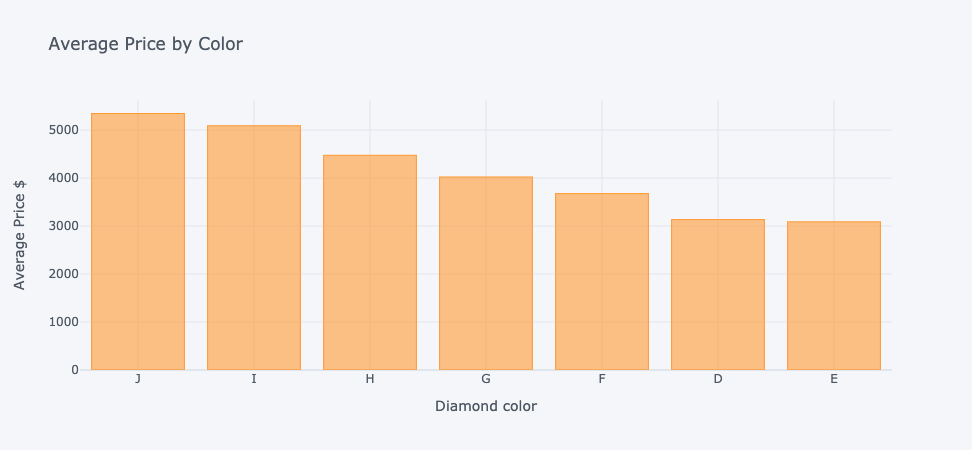

In [24]:
# using cf to make a plot.
price_mean_by_color.iplot(kind='bar',
                         x='color',
                         y='price',
                         title='Average Price by Color',
                         xTitle='Diamond color',
                         yTitle='Average Price $')

In [25]:
# CONCLUSION: J is the most expensive and the less common diamond. D and E have very similar prices. The most common diamond is G.

### Question 4: How cut affect the price?

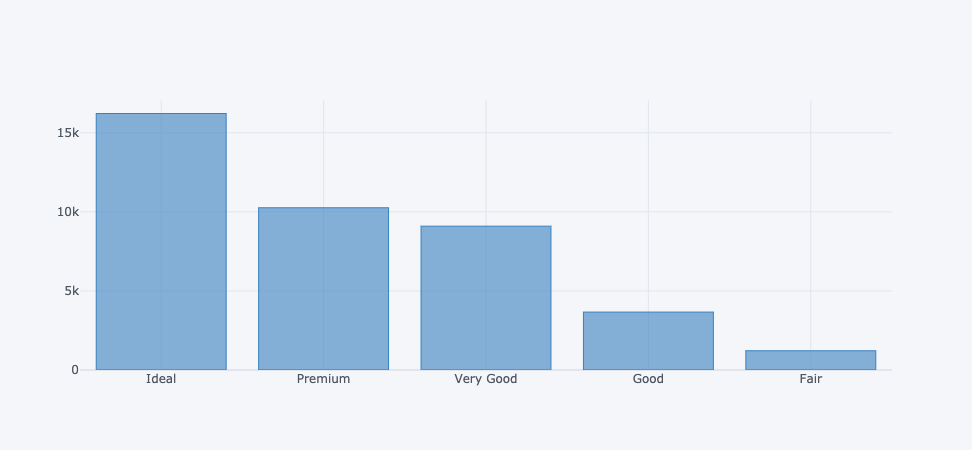

In [26]:
# how many diamonds are there in each cut cathegory?
count_by_color = df['cut'].value_counts()
count_by_color.iplot(kind='bar', color='blue')

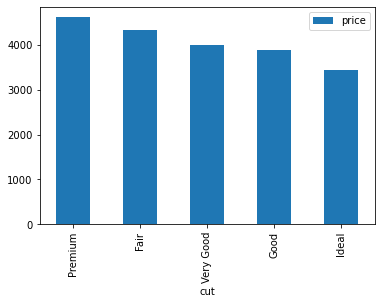

In [27]:
# gruping by cut and average price.
price_by_cut = df.groupby('cut', as_index=False).agg({'price':'mean'}).sort_values(by='price', ascending=False)

# plot using pandas
price_by_cut.plot.bar(x='cut', y='price');

In [28]:
# CONCLUSION: Premium diamonds are the most expensive ones and Ideal the cheapest.
# But Ideal es the top category, why are the cheapest?

In [29]:
df.groupby('cut').agg({'size': 'mean', 'price':'mean', 'carat':'mean', 'depth':'mean', 'table':'mean'}).round(2)

,size,price,carat,depth,table
cut,,,,,
Fair,165.09,4333.27,1.05,64.05,59.02
Good,135.43,3880.61,0.84,62.41,58.65
Ideal,114.96,3436.11,0.70,61.70,55.95
Premium,145.46,4616.58,0.90,61.26,58.74
Very Good,131.21,3994.44,0.81,61.82,57.96


In [30]:
# The Ideal cut is one of the most valued but are the most tiny and with less carat. So carat and size are most important than cut?

In [31]:
ideal_diamonds = df[df['cut'] == 'Ideal']
ideal_diamonds.groupby('color').agg({'color':'count'})
#G, F, E, are the most common colors in Ideal diamonds, which are three of the cheapest colors.

,color
color,
D,2156
E,2917
F,2917
G,3640
H,2363
I,1538
J,689


### Question 5: How clarity affect the price?

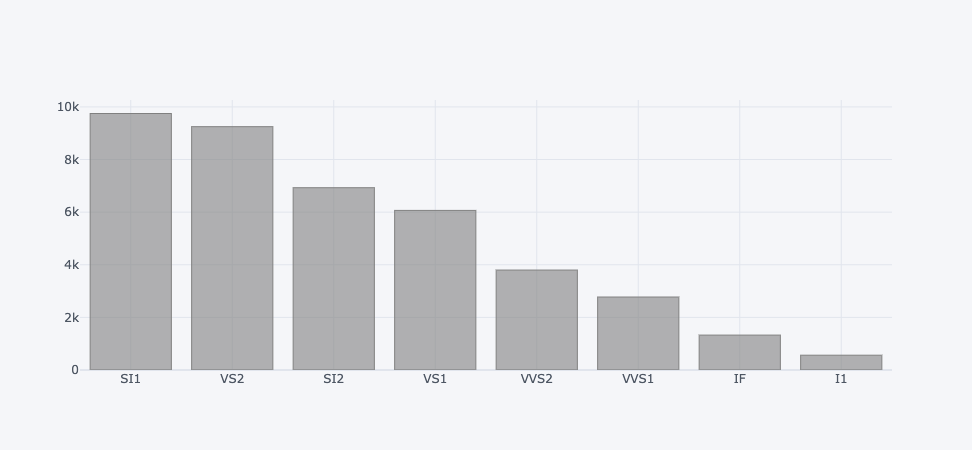

In [32]:
# how many diamonds for each clarity are there?
count_by_clarity = df['clarity'].value_counts()
count_by_clarity.iplot(kind='bar', color='grey')

In [33]:
# let's see the average price by each clarity
price_by_clarity = df.groupby('clarity', as_index=False).agg({'price':'mean'}).sort_values(by='price', ascending=False)

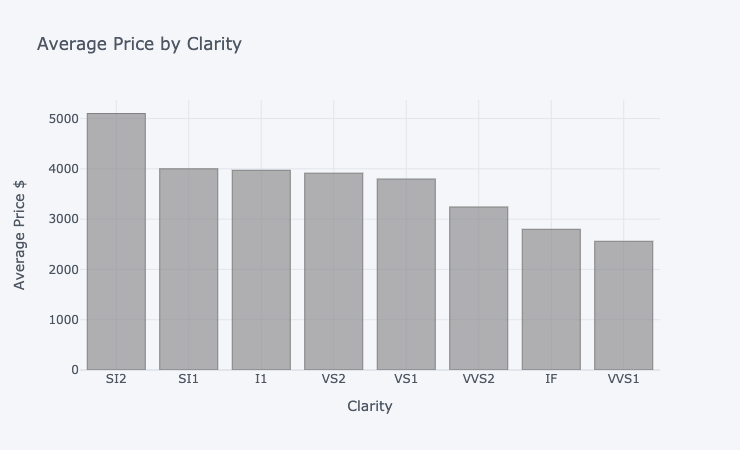

In [34]:
price_by_clarity.iplot(kind='bar',
                         x='clarity',
                         y='price',
                         title='Average Price by Clarity',
                         xTitle='Clarity',
                         yTitle='Average Price $',
                          color='grey')

In [35]:
# Scale: IF, VVS2, VS1, VS2, SI1, SI2, I1
# CONCLUSION: There are just a few IF diamond and, even they are the best, don't have the highest mean price. The highest price is for SI2, one of the worst clarities. Why?

In [36]:
# let's check the size and other characteristics by clarity:
df.groupby('clarity', as_index=False).agg({'size': 'mean', 'price':'mean', 'carat':'mean', 'depth':'mean', 'table':'mean'}).round(2)

,clarity,size,price,carat,depth,table
0,I1,207.00,3971.21,1.30,62.80,58.24
1,IF,82.40,2797.90,0.50,61.51,56.50
2,SI1,138.17,3999.86,0.85,61.86,57.65
3,SI2,175.10,5100.02,1.08,61.78,57.91
4,VS1,117.77,3796.81,0.72,61.68,57.29
5,VS2,124.14,3913.59,0.76,61.72,57.40
6,VVS1,83.20,2559.50,0.51,61.61,56.93
7,VVS2,96.89,3240.98,0.59,61.66,57.03


In [37]:
# CONCLUSION: the size and the carat play a bigger role in the mean price of each diamond, than the clarity.

In [38]:
# export out data set
df.to_csv('../data/diamonds_data.csv')

# Challenge 3: Hypothesis testing

## Test 1 - one sample vs constant hypothesis test.

We know from the available literature that diamonds average price rounds about 4000 USD. The aim is to test whether the prices in our sample are significantly different from the literature value. Give some conclusions about the implications of your test results.

In [39]:
# we import the module ttest_1samp from scipy.
from scipy.stats import ttest_1samp

In [40]:
# list of the diamonds prices.
prices_list = df['price'].to_list()

In [41]:
# use ttest_1samp to make hypothesis test.
ttest_1samp(prices_list, 4000)

Ttest_1sampResult(statistic=-3.6153186556934163, pvalue=0.00030034259538072675)

In [42]:
# CONCLUSION: As the t statistic is negative, the mean of our sample is lowest than 4.000.
# pvalue is less than 0.05, so the difference between our sample and the constant, is significant.
# However, is close to 0.05 so the difference is significant but not huge.

In [43]:
# we check it calculating the price mean
df['price'].mean()

3928.239753794433

## Test 2 - two independent samples.

Our sample includes diamonds with different features (carat, cut, color clarity, etc.). It seems clear that the carat plays an important role in price. However, it's not that clear whether the prices of some "sub-groups" are significantly different from each other.

### 1. Sub-Test 1: Fair cut + color G vs. Fair cut + color I

In [44]:
# as the samples are independant 
from scipy.stats import ttest_ind

In [45]:
# samples
faircut_colorg = df[(df['cut'] == 'Fair') & (df['color'] == 'G')]['price'].to_list()
faircut_colori = df[(df['cut'] == 'Fair') & (df['color'] == 'I')]['price'].to_list()

In [46]:
# testing the hypothesis: are the price of this subgroups significant different?
ttest_ind(faircut_colorg, faircut_colori)

Ttest_indResult(statistic=0.03552493926641288, pvalue=0.971680163699314)

In [47]:
# CONCLUSION: The t statistics tell us that faircut_colorg mean is a little but higher than faircut_colori,
# but this difference it's not significant due to pvalue is greater than 0.05.

### 2. Sub-Test 2: Good cut + color E vs. Good cut + color F

In [48]:
# samples
goodcut_colore = df[(df['cut'] == 'Good') & (df['color'] == 'E')]['price'].to_list()
goodcut_colorf = df[(df['cut'] == 'Good') & (df['color'] == 'F')]['price'].to_list()

In [49]:
# testing the hypothesis: are the price of this subgroups significant different?
ttest_ind(goodcut_colore, goodcut_colorf)

Ttest_indResult(statistic=-0.44021568469654665, pvalue=0.6598512677605672)

In [50]:
# CONCLUSION: the difference between the mean price of this subgroups is not significant because pvalue is greater than 0.05. 
# However, the mean price of goodcut_colore is lower than goodcut_colorf.

In [51]:
# checking out results
print(df[(df['cut'] == 'Good') & (df['color'] == 'E')]['price'].mean())
print(df[(df['cut'] == 'Good') & (df['color'] == 'F')]['price'].mean())

3399.88115942029
3477.504518072289


### 3. Sub-Test 3: Ideal cut + color D vs. Ideal cut + color E

In [62]:
# samples
idealcut_colord = df[(df['cut'] == 'Ideal') & (df['color'] == 'D')]['price'].to_list()
idealcut_colore = df[(df['cut'] == 'Ideal') & (df['color'] == 'E')]['price'].to_list()

In [63]:
# testing the hypothesis: are the price of this subgroups significant different?
ttest_ind(idealcut_colord, idealcut_colore)

Ttest_indResult(statistic=-0.5353150115731534, pvalue=0.5924555216763925)

In [65]:
# CONCLUSION: p value is lightly greater than 0.05 so the difference between the two samples are not significant.
# As t statistic is negative, the idealcut_colore mean is lower than mean of idealcut_colord.

In [66]:
# cheking the results.
print(df[(df['cut'] == 'Ideal') & (df['color'] == 'D')]['price'].mean())
print(df[(df['cut'] == 'Ideal') & (df['color'] == 'E')]['price'].mean())

2579.709647495362
2624.818649297223


### 4. Sub-Test 4: Premium cut + color D vs. Premium cut + color E

In [68]:
# samples
premiumcut_colord = df[(df['cut'] == 'Premium') & (df['color'] == 'D')]['price'].to_list()
premiumcut_colore = df[(df['cut'] == 'Premium') & (df['color'] == 'E')]['price'].to_list()

In [70]:
# testing the hypothesis: are the price of this subgroups significant different?
ttest_ind(premiumcut_colord, premiumcut_colore)

Ttest_indResult(statistic=0.4218931206720332, pvalue=0.6731344334342131)

In [73]:
# CONCLUSION: p value is greater than 0.05 so the difference between the two samples are not significant.
# As t statistic is postive and low, premiumcut_colord mean is lightly greater than premiumcut_colore.

In [72]:
# cheking the results.
print(df[(df['cut'] == 'Premium') & (df['color'] == 'D')]['price'].mean())
print(df[(df['cut'] == 'Premium') & (df['color'] == 'E')]['price'].mean())

3638.838961038961
3578.0864553314123


### 5. Sub-Test 5: Very Good cut + color I vs. Very Good cut + color J

In [75]:
# samples
verygoodcut_colori = df[(df['cut'] == 'Very Good') & (df['color'] == 'I')]['price'].to_list()
verygoodcut_colorj = df[(df['cut'] == 'Very Good') & (df['color'] == 'J')]['price'].to_list()

In [76]:
# testing the hypothesis: are the price of this subgroups significant different?
ttest_ind(verygoodcut_colori, verygoodcut_colorj)

Ttest_indResult(statistic=0.3375452090566639, pvalue=0.7357563230850955)

In [77]:
# CONCLUSION: p value is greater than 0.05 so the difference between the two samples are not significant.
# As t statistic is postive and low, verygoodcut_colori mean is lightly greater than verygoodcut_colorj.

In [78]:
# cheking the results.
print(df[(df['cut'] == 'Very Good') & (df['color'] == 'I')]['price'].mean())
print(df[(df['cut'] == 'Very Good') & (df['color'] == 'J')]['price'].mean())

5292.506104328524
5207.161735700197


### 6. Sub-Test 6: All cuts + color D vs. All cuts + color E

In [80]:
# samples
allcuts_D = df[df['color'] == 'D']['price'].to_list()
allcuts_E = df[df['color'] == 'E']['price'].to_list()

In [82]:
# testing the hypothesis: are the price of this subgroups significant different?
ttest_ind(allcuts_D, allcuts_E)

Ttest_indResult(statistic=0.7630611794666871, pvalue=0.44544145948793734)

In [83]:
# CONCLUSION: p value is greater than 0.05 so the difference between the two samples are not significant.
# As t statistic is postive and low, the color D diamonds have more average price than E color diamonds.

In [84]:
# cheking the results.
print(df[df['color'] == 'D']['price'].mean())
print(df[df['color'] == 'E']['price'].mean())

3134.943157060804
3088.3425255972697
